In [1]:
import numpy as np
import matplotlib.pyplot as plt

from resnet import ResNet
from get_te import get_te

## Generate Lorenz '63 trajectory

In [14]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

dt = 0.02
num_steps = 6250

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)
    
traj = np.vstack((xs[1:],ys[1:],zs[1:]))
time = np.linspace(-100,25,num_steps)

## Sensitivity of $t_e$ to hyperparameters

In [40]:
# Hyperparameter values
rho_vals = np.linspace(0.5,2.5,21)

In [41]:
# warmup
w = 50
trajtest = traj[:,5000+w-1:]

# Train RC for the different hyperparameter values
resnets = []
preds = []
for i in range(len(rho_vals)):
    resnets.append(ResNet(N=300, degree=6, spr=rho_vals[i]))
    resnets[i].train(traj[:,:5000])
    resnets[i].compute_Wout(traj[:,:5000])
    preds.append(resnets[i].test(traj[:,5000:], warmup=50))
    print('rho = {} done.'.format(rho_vals[i]))

rho = 0.5 done.
rho = 0.6 done.
rho = 0.7 done.
rho = 0.8 done.
rho = 0.9 done.
rho = 1.0 done.
rho = 1.1 done.
rho = 1.2000000000000002 done.
rho = 1.3 done.
rho = 1.4 done.
rho = 1.5 done.
rho = 1.6 done.
rho = 1.7000000000000002 done.
rho = 1.8 done.
rho = 1.9000000000000001 done.
rho = 2.0 done.
rho = 2.1 done.
rho = 2.2 done.
rho = 2.3 done.
rho = 2.4000000000000004 done.
rho = 2.5 done.


In [42]:
# Calculate t_e for different hyperparameter values
tes = []
for i in range(len(rho_vals)):
    tes.append(get_te(preds[i],trajtest,eps=0.4,error_version='normnorm'))

Error exceeds threshold value 0.4 after 3 time steps --> t_e = 0.060.
Error exceeds threshold value 0.4 after 29 time steps --> t_e = 0.580.
Error exceeds threshold value 0.4 after 182 time steps --> t_e = 3.640.
Error exceeds threshold value 0.4 after 165 time steps --> t_e = 3.300.
Error exceeds threshold value 0.4 after 301 time steps --> t_e = 6.020.
Error exceeds threshold value 0.4 after 264 time steps --> t_e = 5.280.
Error exceeds threshold value 0.4 after 263 time steps --> t_e = 5.260.
Error exceeds threshold value 0.4 after 176 time steps --> t_e = 3.520.
Error exceeds threshold value 0.4 after 177 time steps --> t_e = 3.540.
Error exceeds threshold value 0.4 after 169 time steps --> t_e = 3.380.
Error exceeds threshold value 0.4 after 178 time steps --> t_e = 3.560.
Error exceeds threshold value 0.4 after 101 time steps --> t_e = 2.020.
Error exceeds threshold value 0.4 after 178 time steps --> t_e = 3.560.
Error exceeds threshold value 0.4 after 77 time steps --> t_e = 1.5

[Text(0.5, 0, 'rho'), Text(0, 0.5, 't_e')]

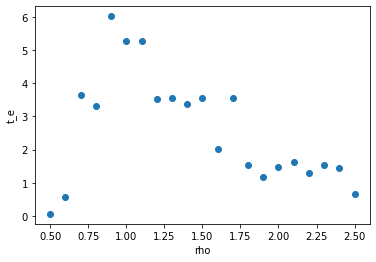

In [44]:
# plot results
fig, ax = plt.subplots()
ax.scatter(rho_vals, tes)
ax.set(xlabel='rho', ylabel='t_e')